# A simple example for a binary classifier

We implement a binary classifier using PyTorch to solve a simple problem. 

We are given a function $f$ defined by 
$$f: \mathbb{R}^2 \to \mathbb{R}, \quad f(x_1,x_2) = \begin{cases} 1 & \text{if}~ x_1x_2 < 0 \\ 0 & \text{else} \end{cases}$$

The neural network we want to develop shall be able to recognise this pattern. 

This problem is explained in the paper by <a href="https://doi.org/10.1016/j.physrep.2019.09.005">F. Ruehle / Physics Reports 839 (2020) 1–117</a>. 

### Libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

### Creation of training and test data

We define a function to create random data. N.B.: If one aims at optimising the training process and the accuracy of the neural network the data used should remain static. In this notebook they are going to change with every new run. But the main goal of this notebook is to illustrate how to get started with as little code as possible. 

In [2]:
# Function to create training and test data 

def createdata(samplesize, scalefactor):
    X = []
    y = []
    for i in range(samplesize):
        X_vec = scalefactor*np.random.normal(size=2)
        X.append(X_vec)
        # implementing the logic to relate features and output
        if (X_vec[0]*X_vec[1] < 0):
            y.append(1)
        else:
            y.append(0)
    
    # Converting numpy arrays containing numbers of float32 into torch tensors
    X = torch.from_numpy(np.asarray(X).astype(np.float32))
    y = torch.from_numpy(np.asarray(y).astype(np.float32))
    y = y.view(y.shape[0], 1) # creating a column vector 

    return X, y
    
# Test data 

X_test, y_test = createdata(1000, 10)

# Training data 

X_train, y_train = createdata(100, 10)

### Defining the neural network

Following the reference we choose a neural network with two hidden layers each having four neurons. For the activation function we choose the sigmoid function. Since we are modeling a map $f: \mathbb{R}^2 \to \mathbb{R}$ the input and output layers have dimensions two and one, respectively. 

In [3]:
# Number of nodes in each layer
input_dim = 2
hidden1_dim = 4
hidden2_dim = 4
output_dim = 1
# Number of hidden layers and its dimensions suggested by F. Ruehle

# Structure
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden1_dim),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden1_dim, hidden2_dim),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden2_dim, output_dim),
    torch.nn.Sigmoid()
)

model.train()

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

Note that we could have chosen a very different structure or varying the numbers and dimensions of hidden layers. But we want to keep things simple. 

### Loss and optimiser

We use the stochastic gradient descent (SGD) and the binary cross entropy loss to define the errors. The learning rate has been chosen such that the accuracy in the test becomes sufficiently high. N.B. there are techniques to find the optimal learning rate in a systematic way. 

In [4]:
learning_rate = 5 # chosen by some trial and error; could be found by some optimisation function

criterion = nn.BCELoss() # binary cross entropy loss

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # stochastic gradient descent

### The training loop

The subsequent code is the canonical way to implement the training of simple neural networks in PyTorch.

epoch: 10, loss = 0.7651
epoch: 20, loss = 0.6763
epoch: 30, loss = 0.6293
epoch: 40, loss = 0.5690
epoch: 50, loss = 0.4318
epoch: 60, loss = 0.3691
epoch: 70, loss = 0.3414
epoch: 80, loss = 0.2420
epoch: 90, loss = 0.1692
epoch: 100, loss = 0.2459
epoch: 110, loss = 0.1299
epoch: 120, loss = 0.0988
epoch: 130, loss = 0.0822
epoch: 140, loss = 0.0833
epoch: 150, loss = 0.0346
epoch: 160, loss = 0.0278
epoch: 170, loss = 0.0238
epoch: 180, loss = 0.0208
epoch: 190, loss = 0.0184
epoch: 200, loss = 0.0165
epoch: 210, loss = 0.0150
epoch: 220, loss = 0.0137
epoch: 230, loss = 0.0126
epoch: 240, loss = 0.0117
epoch: 250, loss = 0.0109
epoch: 260, loss = 0.0102
epoch: 270, loss = 0.0095
epoch: 280, loss = 0.0090
epoch: 290, loss = 0.0085
epoch: 300, loss = 0.0081
epoch: 310, loss = 0.0077
epoch: 320, loss = 0.0073
epoch: 330, loss = 0.0070
epoch: 340, loss = 0.0067
epoch: 350, loss = 0.0064
epoch: 360, loss = 0.0061
epoch: 370, loss = 0.0059
epoch: 380, loss = 0.0057
epoch: 390, loss = 0.

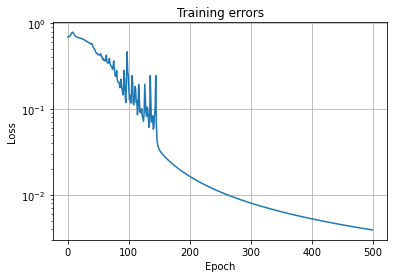

In [5]:
# Training loop

# Implementation of the training 

Loss = [] # collecting losses in list
Epoch = [] # collecting epochs in list
num_epochs = 500 # number of total epochs for the training

for epoch in range(num_epochs):
    
    # Forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # Zero grad before new step
    optimizer.zero_grad()
    
    # Printing some epochs and the current losses
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
    
    # Filling lists for epoch and loss
    Epoch.append(epoch)
    Loss.append(Variable(loss))
    
print('Training completed')

# Plot of the training errors

plt.plot(Epoch, Loss)
plt.title('Training errors')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.grid(True)
plt.show()

### The testing

We simply count in how many cases of the test data the output of the neural network is wrong. Note that we have to round the output to an integer because, by construction, the output of the neural network is in the set $(0,1)$. 

In [6]:
testcases = len(X_test)

fail = 0
for i in range(testcases):
    y_predicted = torch.round(model(X_test[i])) # we round the predicted output 
    # count fails
    if y_predicted != y_test[i]:
        fail += 1
    
accuracy = 1 - fail/testcases # computation of accuracy of the neural network
print('Accuracy:', accuracy)

# example for illustration 
print('Input:', X_test[0])
print('Predicted output (not rounded):', model(X_test[0]))
print('Actual result:', y_test[0])

Accuracy: 0.973
Input: tensor([-3.0780,  1.0756])
Predicted output (not rounded): tensor([0.9968], grad_fn=<SigmoidBackward>)
Actual result: tensor([1.])
